# Projeto 3
## Felipe Scandiuzzi M. Netto e Maria Clara L. Luques
## 2C - Ciência dos Dados

### Usando a variável 'expectativa de vida' como resposta, decidimos utilizar as variáveis '% de adultos entre 15 e 49 anos com HIV' e 'renda per capita', todas no ano de 2010. Tais variáveis foram escolhidas tendo como base o fato de que os aspectos que mais influenciam na expectatica de vida de um país estão relacionados à saúde e à renda da sua população, sendo esses pontos diretamente ligados à boa ou má qualidade de vida do país analisado. 

## Expectativa de vida vs. HIV (% da população entre 15 e 49 anos)
<img src="exhiv.png"/, width=840, height=720 align='center'>
## Expectativa de vida vs. PIB per capita
<img src="expercapita.png"/, width=840, height=700 align='center'>

In [23]:
'''Importando bibliotecas necessárias'''

%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\felipe\Dropbox\Co-Design de Aplicativos\CD


In [24]:
'''Verificando o diretório'''
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\felipe\Dropbox\Co-Design de Aplicativos\CD


In [25]:
'''Lendo tabelas do excel'''

dados1 = pd.read_excel("expectativa.xlsx",index_col=0)
dados2 = pd.read_excel('hiv.xlsx',index_col=0)
dados3 = pd.read_excel('per_capita.xlsx',index_col=0)
dados4 = pd.read_excel('EstudoMulheres.xlsx', index_col=0)

'''Separando apenas o ano de 2010 e transformando em DataFrame'''

expec = pd.DataFrame(dados1.ExpecV)
expec = expec.sort_values(['ExpecV'], axis=0, ascending=True)
hiv = pd.DataFrame(dados2.HIVs)
hiv = hiv.sort_values(['HIVs'], axis=0, ascending=True)
lnhiv = pd.DataFrame(dados2.LNHIVs)
per_capita = pd.DataFrame(dados3.PerCap)
lnpercap = pd.DataFrame(dados3.LNPerCap)
Emulheres = pd.DataFrame(dados4.EstMu)

In [26]:
'''Os Países com 'Nan' em alguma das variáveis não foram retirados ainda para não haver conflito entre o numero de paises em 
cada uma das tabelas, pois nem todos com falta de dados necessariamente tem esse deficit em todas as variáveis.'''

"Os Países com 'Nan' em alguma das variáveis não foram retirados ainda para não haver conflito entre o numero de paises em \ncada uma das tabelas, pois nem todos com falta de dados necessariamente tem esse deficit em todas as variáveis."

In [27]:
dados = expec.join(hiv, how='outer')
dados = dados.join(per_capita, how='outer')
dados = dados.join(lnhiv, how='outer')
dados = dados.join(lnpercap, how='outer')
dados = dados.join(Emulheres, how='outer')

dados=dados[~np.isnan(dados.ExpecV)]
dados=dados[~np.isnan(dados.HIVs)]
dados=dados[~np.isnan(dados.PerCap)]
dados = dados[~np.isnan(dados.LNHIVs)]
dados = dados[~np.isnan(dados.LNPerCap)]
dados = dados[~np.isnan(dados.EstMu)]
dados.head(10)
dados = dados.sort_values(['ExpecV', 'LNHIVs'], axis=0, ascending=True)
dados.head()

,ExpecV,HIVs,PerCap,LNHIVs,LNPerCap,EstMu
Haiti,32.2,1.9,1518.0,0.641920,7.325909,5.7
Lesotho,46.4,23.2,2235.0,3.144478,7.712796,9.5
Swaziland,46.4,25.9,5862.0,3.254580,8.677146,9.1
Zimbabwe,49.1,15.2,1484.0,2.721578,7.303254,9.0
Somalia,51.6,0.7,614.0,-0.356712,6.420661,1.7


In [28]:
dados.shape

(133, 6)

## Análise Descritiva

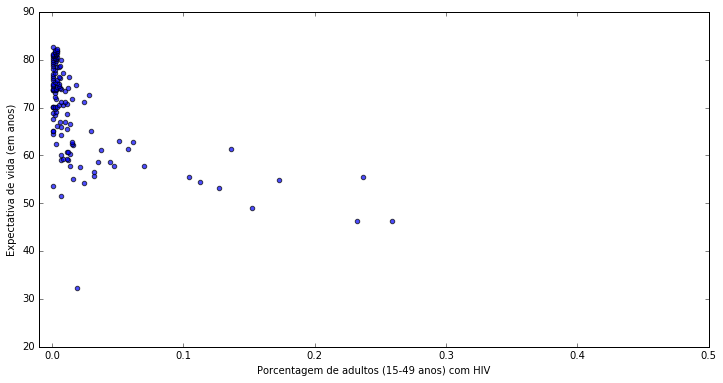

In [29]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(dados.HIVs/100, dados.ExpecV, alpha=0.7)
plt.xlabel("Porcentagem de adultos (15-49 anos) com HIV")
plt.ylabel("Expectativa de vida (em anos)")
plt.xlim(-0.01,0.5)
plt.show()

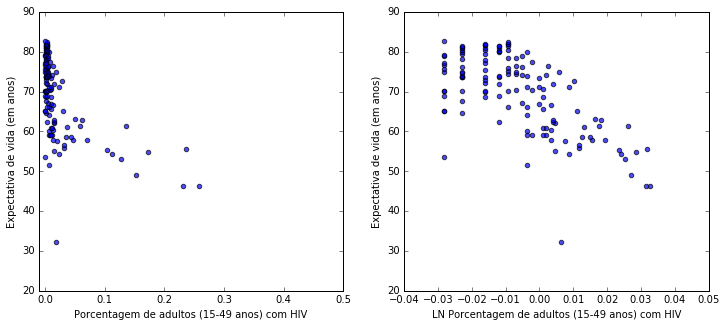

In [30]:
f, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(dados.HIVs/100, dados.ExpecV, alpha=0.7)
ax[0].set_xlabel("Porcentagem de adultos (15-49 anos) com HIV")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_xlim(-0.01,0.5)

ax[1].scatter(dados.LNHIVs/100, dados.ExpecV, alpha=0.7)
ax[1].set_xlabel("LN Porcentagem de adultos (15-49 anos) com HIV")
ax[1].set_ylabel("Expectativa de vida (em anos)")

plt.show()

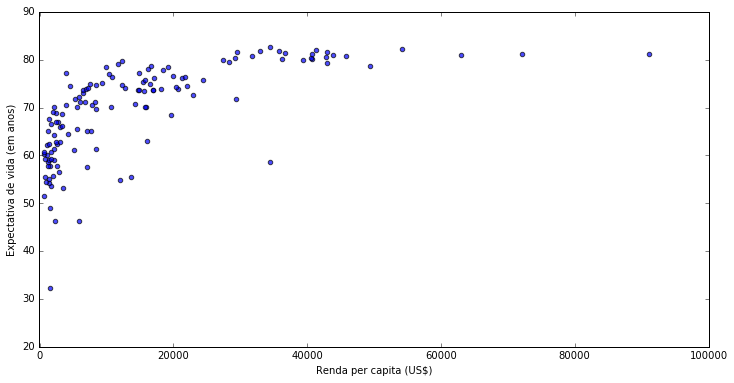

In [31]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(dados.PerCap, dados.ExpecV, alpha=0.7) 
plt.xlabel("Renda per capita (US$)")
plt.ylabel("Expectativa de vida (em anos)")
plt.xlim(-100,100000)
plt.show()

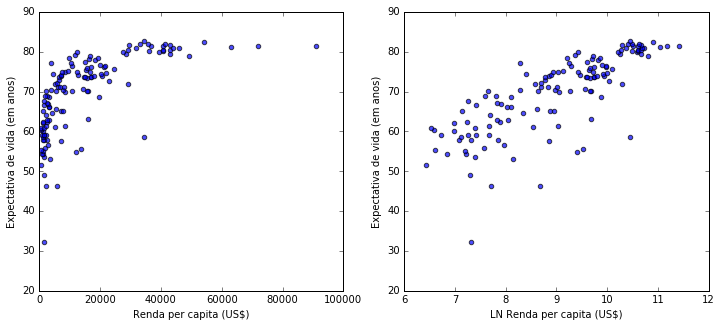

In [32]:
f, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(dados.PerCap, dados.ExpecV, alpha=0.7)
ax[0].set_xlabel("Renda per capita (US$)")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_xlim(-100,100000)

ax[1].scatter(dados.LNPerCap, dados.ExpecV, alpha=0.7)
ax[1].set_xlabel("LN Renda per capita (US$)")
ax[1].set_ylabel("Expectativa de vida (em anos)")

plt.show()

In [33]:
dados.corr(method='pearson')

,ExpecV,HIVs,PerCap,LNHIVs,LNPerCap,EstMu
ExpecV,1.000000,-0.573500,0.657795,-0.663744,0.781098,0.689243
HIVs,-0.573500,1.000000,-0.211745,0.742749,-0.223086,-0.128778
PerCap,0.657795,-0.211745,1.000000,-0.341194,0.852652,0.641712
LNHIVs,-0.663744,0.742749,-0.341194,1.000000,-0.427872,-0.376587
LNPerCap,0.781098,-0.223086,0.852652,-0.427872,1.000000,0.831703
EstMu,0.689243,-0.128778,0.641712,-0.376587,0.831703,1.000000


In [34]:
model = sm.ols(formula='ExpecV ~ LNHIVs + LNPerCap', data = dados)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 ExpecV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     188.0
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           4.38e-39
Time:                        19:51:59   Log-Likelihood:                -399.96
No. Observations:                 133   AIC:                             805.9
Df Residuals:                     130   BIC:                             814.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     25.7282      3.370      7.635      0.0

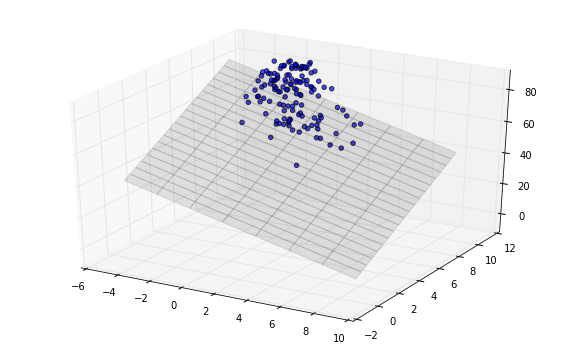

In [35]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(-5, 10, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'LNHIVs': x_surf.ravel(), 'LNPerCap': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['LNHIVs'], dados['LNPerCap'], dados['ExpecV'],
           c='blue',
           marker='o',
           alpha=0.7)


plt.show()

<IPython.core.display.Javascript object>


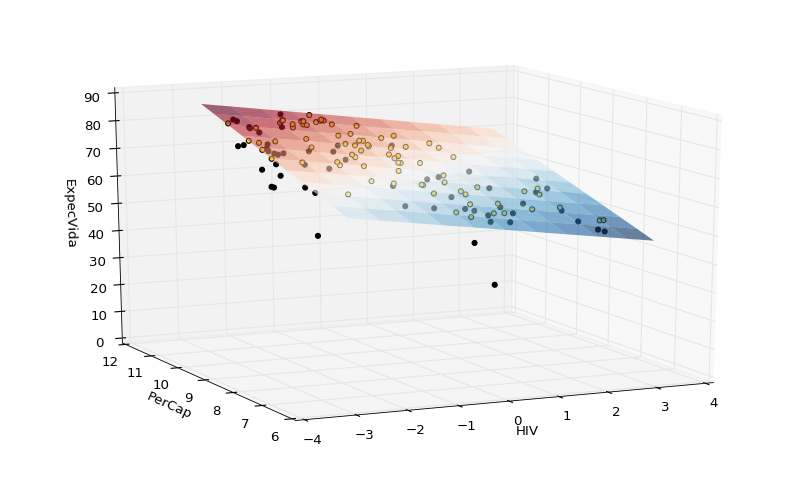

In [43]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

X = dados[['LNHIVs', 'LNPerCap']]
y = dados['ExpecV']

## fit a OLS model with intercept on TV and Radio
X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

# set axis labels
ax.set_xlabel('HIV')
ax.set_ylabel('PerCap')
ax.set_zlabel('ExpecVida')

plt.show()

In [37]:
dados.EstMu.describe()

count    133.000000
mean       8.598496
std        3.701760
min        0.800000
25%        5.500000
50%        9.400000
75%       11.900000
max       14.700000
Name: EstMu, dtype: float64

<IPython.core.display.Javascript object>


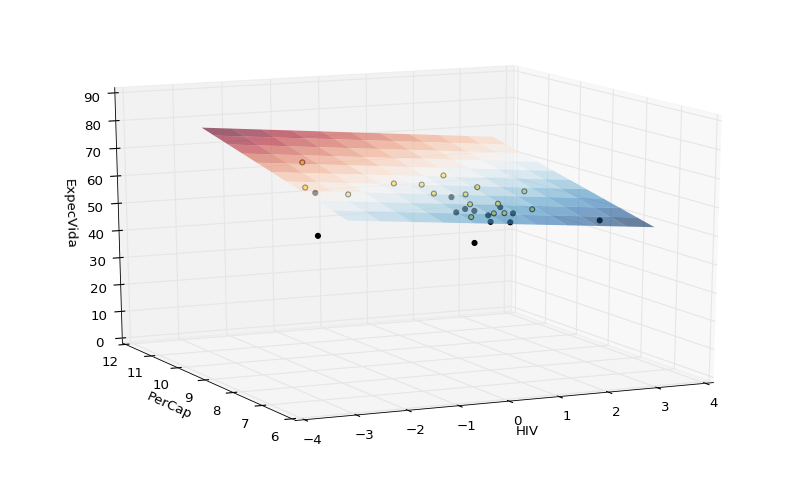

In [42]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

dados1 = dados[dados.EstMu<=5]
%matplotlib notebook

X = dados1[['LNHIVs', 'LNPerCap']]
y = dados1['ExpecV']

## fit a OLS model with intercept on TV and Radio
X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

# set axis labels
ax.set_xlabel('HIV')
ax.set_ylabel('PerCap')
ax.set_zlabel('ExpecVida')

plt.show()

In [46]:
dados10 = dados[dados.EstMu<=5]
y=dados10.ExpecV
X=dados10.iloc[:,(1,2)]
X=sm1.add_constant(X)
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ExpecV   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.777
Date:                Tue, 06 Dec 2016   Prob (F-statistic):             0.0171
Time:                        20:21:50   Log-Likelihood:                -85.563
No. Observations:                  29   AIC:                             177.1
Df Residuals:                      26   BIC:                             181.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         60.2760      1.792     33.627      0.000        56.592    63.961
HIVs          -0.9106      0.445     -2.046      0.051        -1.825     0.004
PerCap         0.0012      0.001      1.933      0.064      -7.4e-05     0.002
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.270
Skew:                          -0.322   Prob(JB):                        0.530
Kurtosis:                       2.203   Cond. No.                     5.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


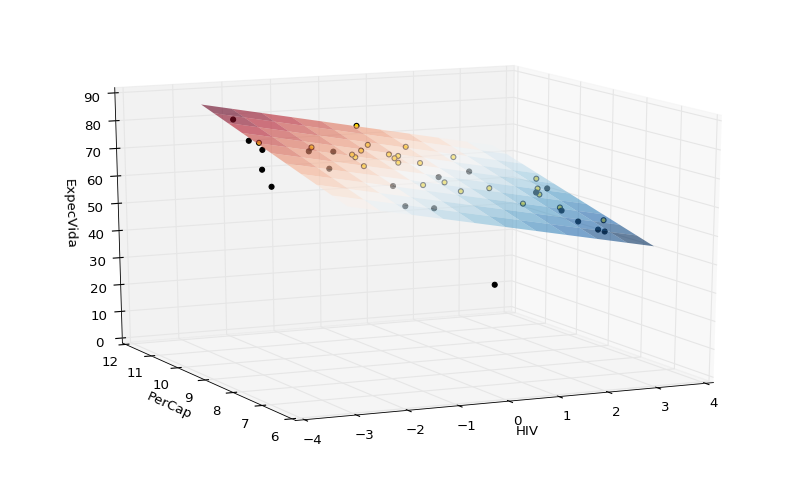

In [41]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

dados1 = dados[(dados.EstMu>5)&(dados.EstMu<=10)]
%matplotlib notebook

X = dados1[['LNHIVs', 'LNPerCap']]
y = dados1['ExpecV']

## fit a OLS model with intercept on TV and Radio
X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

# set axis labels
ax.set_xlabel('HIV')
ax.set_ylabel('PerCap')
ax.set_zlabel('ExpecVida')

plt.show()

In [47]:
dados10 = dados[(dados.EstMu>5)&(dados.EstMu<=10)]
y=dados10.ExpecV
X=dados10.iloc[:,(1,2)]
X=sm1.add_constant(X)
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ExpecV   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     25.18
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           6.51e-08
Time:                        20:22:39   Log-Likelihood:                -151.64
No. Observations:                  45   AIC:                             309.3
Df Residuals:                      42   BIC:                             314.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         67.4816      1.646     40.992      0.000        64.159    70.804
HIVs          -0.9587      0.160     -5.990      0.000        -1.282    -0.636
PerCap         0.0003   9.46e-05      2.850      0.007      7.87e-05     0.000
==============================================================================
Omnibus:                       46.227   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.024
Skew:                          -2.501   Prob(JB):                     1.67e-48
Kurtosis:                      12.609   Cond. No.                     2.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


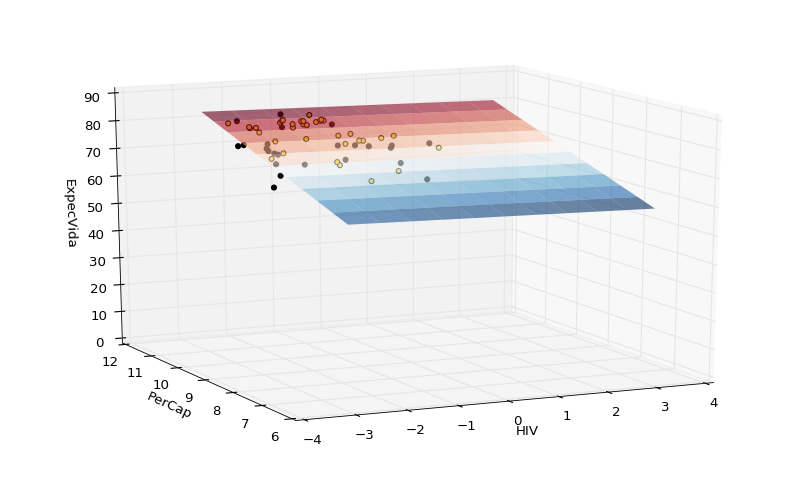

In [40]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

dados1 = dados[dados.EstMu>10]
%matplotlib notebook

X = dados1[['LNHIVs', 'LNPerCap']]
y = dados1['ExpecV']

## fit a OLS model with intercept on TV and Radio
X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

# set axis labels
ax.set_xlabel('HIV')
ax.set_ylabel('PerCap')
ax.set_zlabel('ExpecVida')

plt.show()

In [48]:
dados10 = dados[dados.EstMu>10]
y=dados10.ExpecV
X=dados10.iloc[:,(1,2)]
X=sm1.add_constant(X)
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ExpecV   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     31.67
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           6.29e-10
Time:                        20:23:07   Log-Likelihood:                -149.37
No. Observations:                  59   AIC:                             304.7
Df Residuals:                      56   BIC:                             311.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         72.2749      0.862     83.810      0.000        70.547    74.002
HIVs          -1.3132      0.858     -1.530      0.132        -3.032     0.406
PerCap         0.0002   2.48e-05      7.545      0.000         0.000     0.000
==============================================================================
Omnibus:                        6.930   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.175
Skew:                          -0.765   Prob(JB):                       0.0456
Kurtosis:                       3.416   Cond. No.                     7.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""